# Линейные модели, SVM и деревья решений.

**Цель работы:** изучение линейных моделей, SVM и деревьев решений.

Выбранный датасет: college exam results


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [51]:
data = pd.read_csv('StudentsPerformance.csv')

In [52]:
data.shape

(1000, 8)

In [53]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [54]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [55]:
data.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

Пропусков нет.

Выполним кодирование категориальных признаков:

In [56]:
data = pd.get_dummies(data, columns=['race/ethnicity'])
data

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,bachelor's degree,standard,none,72,72,74,False,True,False,False,False
1,female,some college,standard,completed,69,90,88,False,False,True,False,False
2,female,master's degree,standard,none,90,95,93,False,True,False,False,False
3,male,associate's degree,free/reduced,none,47,57,44,True,False,False,False,False
4,male,some college,standard,none,76,78,75,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,99,95,False,False,False,False,True
996,male,high school,free/reduced,none,62,55,55,False,False,True,False,False
997,female,high school,free/reduced,completed,59,71,65,False,False,True,False,False
998,female,some college,standard,completed,68,78,77,False,False,False,True,False


In [57]:
education_mapping = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    'associate\'s degree': 4,
    'bachelor\'s degree': 5,
    'master\'s degree': 6
}

lunch_mapping = {
    'free/reduced': 0,
    'standard': 1
}

test_preparation_mapping = {
    'none': 0,
    'completed': 1
}

data['parental level of education'] = data['parental level of education'].map(education_mapping)
data['lunch'] = data['lunch'].map(lunch_mapping)
data['test preparation course'] = data['test preparation course'].map(test_preparation_mapping)

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [59]:
# Выберите только числовые столбцы
num_data = data.select_dtypes(include=['float64', 'int64'])

# Примените преобразование (например, стандартизацию)
scaled_data = (num_data - num_data.mean()) / num_data.std()

# Скопируйте преобразованные столбцы обратно в исходный набор данных
data[num_data.columns] = scaled_data


In [60]:
data

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1.314084,0.741510,-0.746374,0.389828,0.193902,0.391296,False,True,False,False,False
1,0,-0.055467,0.741510,1.338470,0.191979,1.426762,1.312612,False,False,True,False,False
2,0,1.998860,0.741510,-0.746374,1.576922,1.769223,1.641653,False,True,False,False,False
3,1,0.629309,-1.347251,-0.746374,-1.258913,-0.833482,-1.582952,True,False,False,False,False
4,1,-0.055467,0.741510,-0.746374,0.653627,0.604855,0.457104,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.998860,0.741510,1.338470,1.445023,2.043192,1.773270,False,False,False,False,True
996,1,-0.740242,-1.347251,-0.746374,-0.269668,-0.970467,-0.859061,False,False,True,False,False
997,0,-0.740242,-1.347251,1.338470,-0.467517,0.125409,-0.200978,False,False,True,False,False
998,0,-0.055467,0.741510,1.338470,0.126030,0.604855,0.588721,False,False,False,True,False


В качестве целевого признака выберем пол:

In [61]:
from sklearn.model_selection import train_test_split

target = 'writing score'

X = data.drop(target, axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
X_train.shape, y_train.shape,

((800, 11), (800,))

In [63]:
X_test.shape, y_test.shape

((200, 11), (200,))

## Обучение моделей

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [65]:

linear_regression = LinearRegression()
svm = SVR()
decision_tree = DecisionTreeClassifier()

linear_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
linear_regression_pred = linear_regression.predict(X_test)
linear_regression_pred

array([88.87008167, 66.5011264 , 73.08408292, 71.1339806 , 79.76151845,
       73.68463711, 68.59952887, 62.57892369, 72.95235072, 51.25389302,
       41.53034408, 21.72976259, 79.14257286, 62.9688065 , 82.03071407,
       78.77448108, 49.46402173, 47.68427341, 57.14849121, 65.6603114 ,
       71.60772212, 55.66031902, 69.4026934 , 49.46983423, 77.6050834 ,
       73.7522358 , 73.75491287, 56.23014487, 48.34435586, 58.37157574,
       56.83541528, 64.80344249, 59.07968528, 66.02028795, 72.29924377,
       52.10314865, 74.48564271, 77.05586204, 79.64522417, 14.65846615,
       76.68599893, 63.22718659, 64.92488956, 61.5252036 , 84.19638548,
       64.52437861, 67.06405435, 32.02164466, 86.50649775, 83.01834076,
       72.18244932, 75.58291121, 77.7907192 , 58.47210869, 71.96554368,
       75.08562029, 78.70629149, 52.35709853, 80.55041691, 90.55006755,
       41.1185269 , 82.93626496, 80.03626601, 61.15714417, 88.56850015,
       77.48861371, 68.66314425, 50.34206935, 67.80788453, 93.32

In [ ]:
svm_pred = svm.predict(X_test)
svm_pred

array([85.32469995, 62.4475298 , 74.50915754, 75.97595649, 82.28830753,
       76.13323393, 69.57213816, 58.88862269, 75.90033334, 53.2210759 ,
       47.66289304, 37.65356725, 76.47648041, 60.73601667, 81.12192718,
       74.460464  , 52.31967638, 49.03147156, 55.38929986, 62.47857568,
       73.592416  , 50.0184489 , 65.6596629 , 50.09103808, 78.65637086,
       75.92451504, 72.4183231 , 54.68442756, 46.94779794, 55.69018254,
       60.88442134, 63.22724765, 62.48831565, 71.98151667, 78.11984988,
       51.502723  , 77.44526053, 74.82182585, 76.67819596, 40.8300227 ,
       76.36894641, 65.33935883, 62.30738755, 60.43564877, 85.77638274,
       61.63897026, 70.6943009 , 38.56213379, 86.12462065, 79.80463822,
       73.79914786, 72.86016278, 78.56610897, 54.10747074, 71.70835531,
       72.5805387 , 79.65713802, 54.90045505, 84.11359529, 86.82070426,
       44.43397125, 80.23442942, 77.62336518, 59.92475046, 86.28618045,
       71.94266879, 66.68855447, 54.33113485, 61.44829943, 89.41

In [ ]:
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_pred

array([ 90,  68,  74,  69,  79,  68,  70,  65,  78,  49,  50,  38,  84,
        59,  80,  78,  51,  43,  59,  70,  74,  51,  70,  46,  76,  68,
        68,  54,  50,  57,  54,  63,  60,  65,  77,  51,  75,  73,  79,
        36,  74,  68,  63,  62,  85,  66,  78,  36,  79,  75,  76,  76,
        79,  65,  77,  75,  77,  48,  76,  88,  34,  82,  74,  62,  86,
        79,  70,  53,  66,  92,  66,  87,  53,  60,  58,  65,  81,  47,
        61,  41,  54,  38,  77,  70,  74,  72,  78,  70,  88,  38,  80,
        90,  62,  74,  38,  72,  61,  72,  80,  69,  76,  58,  62,  67,
        74,  58,  43,  71,  76,  62,  38,  82,  55,  62,  83,  56,  51,
        34,  68,  75,  66,  72,  74,  77,  71,  61,  83,  77,  48,  71,
        77,  68,  34, 100,  68,  36,  91,  89,  65,  51,  57,  70,  58,
        50,  69,  62,  38,  66,  51,  82,  71,  84,  60,  68,  89,  66,
        57,  74,  65,  43,  81,  68,  80,  49,  80,  76,  43,  91,  66,
        78,  78,  68,  86,  85,  52,  38,  51,  81,  85,  77,  6

In [ ]:
y_test

521    84
737    73
740    72
660    73
411    78
       ..
408    56
332    53
208    76
613    74
78     72
Name: writing score, Length: 200, dtype: int64

In [ ]:
linear_regression_mse = mean_squared_error(y_test, linear_regression_pred)
svr_mse = mean_squared_error(y_test, svm_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)

In [ ]:
linear_regression_r2 = r2_score(y_test, linear_regression_pred)
svr_r2 = r2_score(y_test, svm_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

In [ ]:
print("Linear Regression MSE:", linear_regression_mse)
print("SVM Accuracy:", svr_mse)
print("Decision Tree Accuracy:", decision_tree_mse)

Linear Regression MSE: 14.980822041816777
SVM Accuracy: 35.42882387369354
Decision Tree Accuracy: 40.79


In [ ]:
print("Linear Regression R²:", linear_regression_r2)
print("SVR R²:", svr_r2)
print("Decision Tree R²:", decision_tree_r2)

Linear Regression R²: 0.9378432907399291
SVR R²: 0.8530027859087786
Decision Tree R²: 0.8307588085859927


## Важность признаков в дереве решений

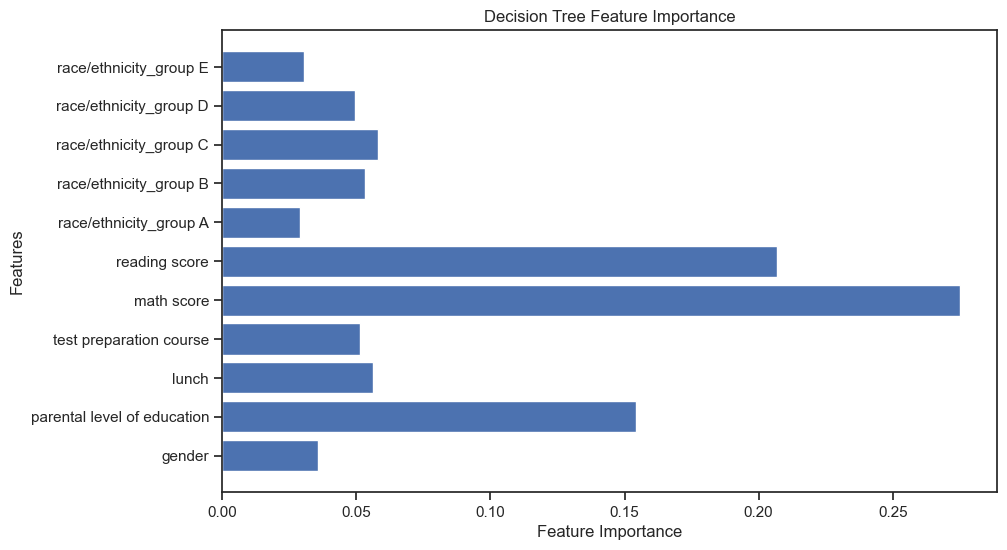

In [ ]:


feature_importances = decision_tree.feature_importances_

feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()


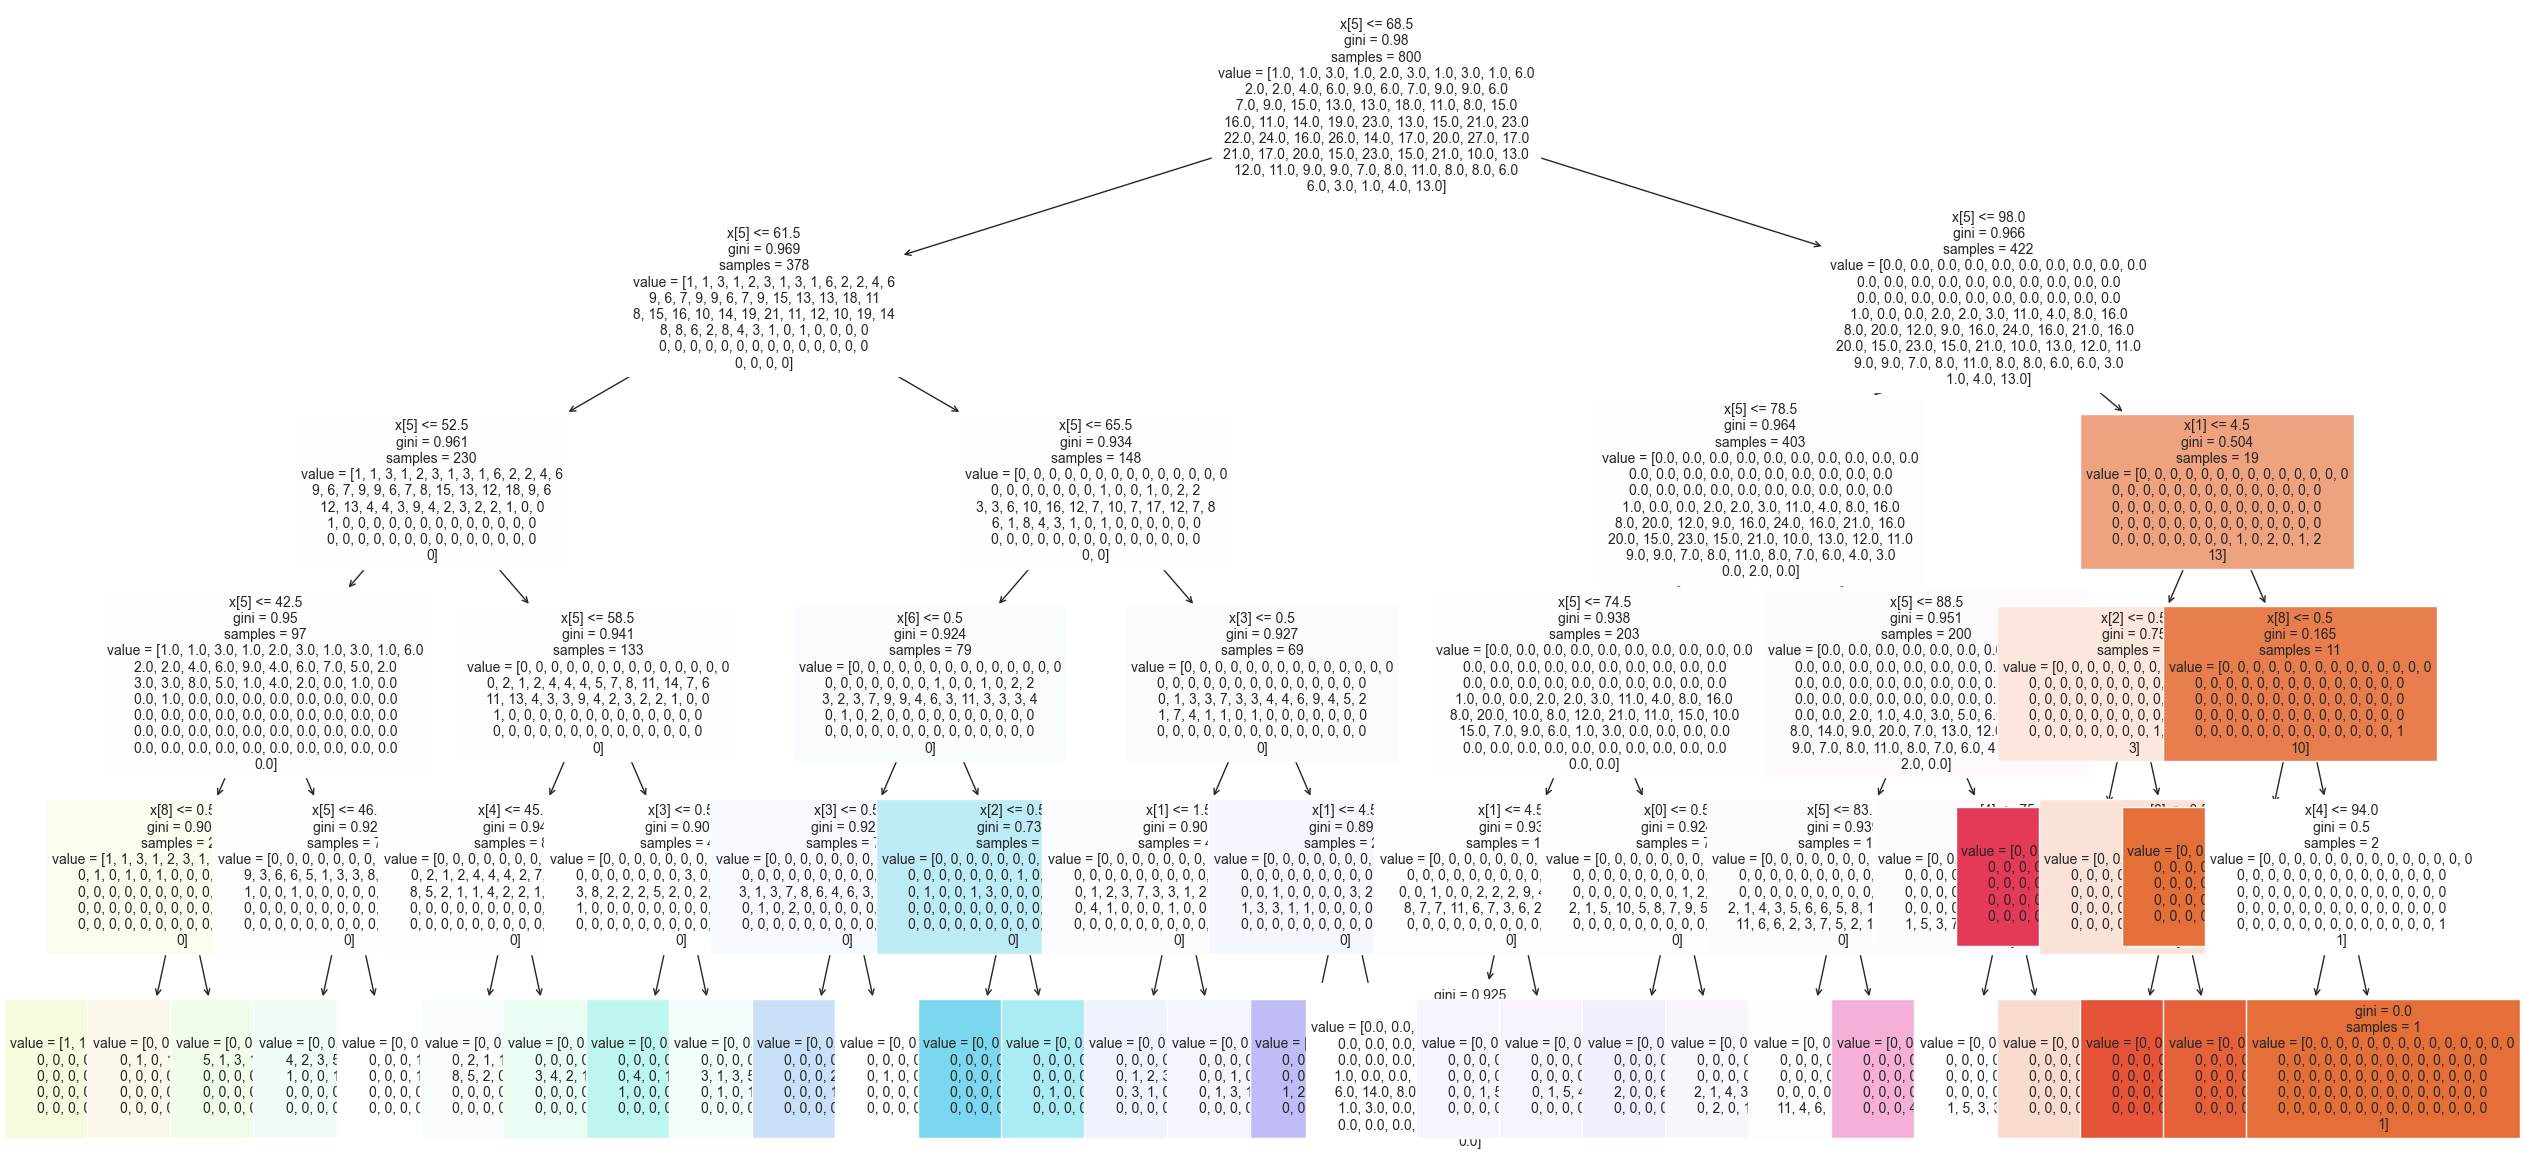

In [ ]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(max_depth=5, random_state=0)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 15))
plot_tree(clf, fontsize=10, filled=True)
plt.show()